Broadcasting = 다른 배열에 이항 UFuncs(+, -, * 등)을 적용하기 위한 규칙을 이해함

In [1]:
import numpy as np

같은 크기의 배열에서 이항 연산은 배열의 요소 단위로 수행 된다는 점을 기억하자 

In [2]:
a = np.array([0,1,2])
b = np.array([5,5,5])
a+b

array([5, 6, 7])

브로드캐스팅을 사용하면 이러한 이항연산을 서로 다른 배열에서 수행할 수 있다.
예를 들어 스칼라(0차원 배열) 이라 생각하고 실행

In [3]:
a+5

array([5, 6, 7])

In [4]:
M = np.ones((3,3))
M

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [5]:
M+a

array([[ 1.,  2.,  3.],
       [ 1.,  2.,  3.],
       [ 1.,  2.,  3.]])

In [6]:
a=np.arange(3)
b=np.arange(3)[:, np.newaxis]
a

array([0, 1, 2])

In [7]:
b

array([[0],
       [1],
       [2]])

In [8]:
a+b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

브로드캐스팅 규칙

a배열과 b배열의 브로드캐스팅을 시도할때, 
차원이 같거나 스칼라 계산은 다 되는데....

(주의) 낮은 차원을 브로드캐스팅을 위해 차원을 올리고 행을 맞추었을때 
낮았던 차원의 배열의 크기가 더 커지면 브로드캐스팅이 안됨



In [9]:
M = np.ones((2,3))
a = np.arange(3)
M

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [10]:
M+a

array([[ 1.,  2.,  3.],
       [ 1.,  2.,  3.]])

In [11]:
a = np.arange(3).reshape((3,1))
b = np.arange(4)

In [12]:
a

array([[0],
       [1],
       [2]])

In [13]:
b

array([0, 1, 2, 3])

In [14]:
a+b

array([[0, 1, 2, 3],
       [1, 2, 3, 4],
       [2, 3, 4, 5]])

In [15]:
b+a

array([[0, 1, 2, 3],
       [1, 2, 3, 4],
       [2, 3, 4, 5]])

In [16]:
M = np.ones((3,2))
a = np.arange(3)

In [17]:
M

array([[ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.]])

In [18]:
a

array([0, 1, 2])

In [19]:
a+M

ValueError: operands could not be broadcast together with shapes (3,) (3,2) 

In [ ]:
M+a

In [20]:
M+a[:, np.newaxis]

array([[ 1.,  1.],
       [ 2.,  2.],
       [ 3.,  3.]])

log(exp(a) + exp(b))를 기본 방식보다 더 정확하게 계산하는 logaddexp(a,b)의 예

In [21]:
np.logaddexp(M, a[:, np.newaxis])

array([[ 1.31326169,  1.31326169],
       [ 1.69314718,  1.69314718],
       [ 2.31326169,  2.31326169]])

편차 구하여 정렬하기

In [22]:
X = np.random.random((10,3))
X

array([[ 0.82545338,  0.73817413,  0.39944592],
       [ 0.65760853,  0.60337799,  0.50665979],
       [ 0.42295523,  0.80755261,  0.38479393],
       [ 0.15721455,  0.01240874,  0.89241964],
       [ 0.96671076,  0.06862997,  0.79442203],
       [ 0.72557374,  0.48041904,  0.33497702],
       [ 0.65264801,  0.93682592,  0.13588467],
       [ 0.67712654,  0.60314635,  0.44703012],
       [ 0.41235382,  0.36688783,  0.34372705],
       [ 0.02223561,  0.78987904,  0.19155257]])

In [23]:
X.mean()

0.51193648386828472

In [24]:
X.mean(0) # 0 은 axis=0의 의미이면 각 열의 평균을 구하라는 뜻

array([ 0.55198802,  0.54073016,  0.44309127])

In [25]:
X.mean(axis=0)

array([ 0.55198802,  0.54073016,  0.44309127])

In [26]:
X.mean(1)

array([ 0.65435781,  0.58921544,  0.53843392,  0.35401431,  0.60992092,
        0.5136566 ,  0.57511953,  0.57576767,  0.3743229 ,  0.33455574])

In [27]:
X.mean(axis=1).reshape((10,1))

array([[ 0.65435781],
       [ 0.58921544],
       [ 0.53843392],
       [ 0.35401431],
       [ 0.60992092],
       [ 0.5136566 ],
       [ 0.57511953],
       [ 0.57576767],
       [ 0.3743229 ],
       [ 0.33455574]])

In [28]:
Xmean = X.mean(0)
Xmean

array([ 0.55198802,  0.54073016,  0.44309127])

In [29]:
X_centered = X - Xmean # 편차를 브로드 캐스팅을 이용하여 쉽게 구할 수 있음
X_centered

array([[ 0.27346537,  0.19744397, -0.04364535],
       [ 0.10562051,  0.06264783,  0.06356852],
       [-0.12903278,  0.26682245, -0.05829734],
       [-0.39477347, -0.52832142,  0.44932836],
       [ 0.41472274, -0.47210019,  0.35133075],
       [ 0.17358572, -0.06031112, -0.10811425],
       [ 0.10066   ,  0.39609576, -0.30720661],
       [ 0.12513852,  0.06241619,  0.00393884],
       [-0.1396342 , -0.17384233, -0.09936422],
       [-0.52975241,  0.24914888, -0.25153871]])

In [30]:
X_centered.mean(0) #확인용

array([  0.00000000e+00,  -7.77156117e-17,  -6.66133815e-17])

2차원 함수 플로팅하기

In [31]:
# x와 t는 0에서 5까지 50단계로 나눈 배열임
x = np.linspace(0,5,50)
y = np.linspace(0,5,50)[:, np.newaxis]
z = np.sin(x)**10 + np.cos(10+y*x)*np.cos(x)

In [32]:
x

array([ 0.        ,  0.10204082,  0.20408163,  0.30612245,  0.40816327,
        0.51020408,  0.6122449 ,  0.71428571,  0.81632653,  0.91836735,
        1.02040816,  1.12244898,  1.2244898 ,  1.32653061,  1.42857143,
        1.53061224,  1.63265306,  1.73469388,  1.83673469,  1.93877551,
        2.04081633,  2.14285714,  2.24489796,  2.34693878,  2.44897959,
        2.55102041,  2.65306122,  2.75510204,  2.85714286,  2.95918367,
        3.06122449,  3.16326531,  3.26530612,  3.36734694,  3.46938776,
        3.57142857,  3.67346939,  3.7755102 ,  3.87755102,  3.97959184,
        4.08163265,  4.18367347,  4.28571429,  4.3877551 ,  4.48979592,
        4.59183673,  4.69387755,  4.79591837,  4.89795918,  5.        ])

In [33]:
y

array([[ 0.        ],
       [ 0.10204082],
       [ 0.20408163],
       [ 0.30612245],
       [ 0.40816327],
       [ 0.51020408],
       [ 0.6122449 ],
       [ 0.71428571],
       [ 0.81632653],
       [ 0.91836735],
       [ 1.02040816],
       [ 1.12244898],
       [ 1.2244898 ],
       [ 1.32653061],
       [ 1.42857143],
       [ 1.53061224],
       [ 1.63265306],
       [ 1.73469388],
       [ 1.83673469],
       [ 1.93877551],
       [ 2.04081633],
       [ 2.14285714],
       [ 2.24489796],
       [ 2.34693878],
       [ 2.44897959],
       [ 2.55102041],
       [ 2.65306122],
       [ 2.75510204],
       [ 2.85714286],
       [ 2.95918367],
       [ 3.06122449],
       [ 3.16326531],
       [ 3.26530612],
       [ 3.36734694],
       [ 3.46938776],
       [ 3.57142857],
       [ 3.67346939],
       [ 3.7755102 ],
       [ 3.87755102],
       [ 3.97959184],
       [ 4.08163265],
       [ 4.18367347],
       [ 4.28571429],
       [ 4.3877551 ],
       [ 4.48979592],
       [ 4

In [34]:
z

array([[-0.83907153, -0.83470697, -0.8216586 , ...,  0.8956708 ,
         0.68617261,  0.41940746],
       [-0.83907153, -0.82902677, -0.8103873 , ...,  0.92522407,
         0.75321348,  0.52508175],
       [-0.83907153, -0.82325668, -0.79876457, ...,  0.96427357,
         0.84172689,  0.66446403],
       ..., 
       [-0.83907153, -0.48233077, -0.01646558, ...,  0.96449925,
         0.75196531,  0.41982581],
       [-0.83907153, -0.47324558,  0.00392612, ...,  0.92542163,
         0.68540362,  0.37440839],
       [-0.83907153, -0.46410908,  0.02431613, ...,  0.89579384,
         0.65690314,  0.40107702]])

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

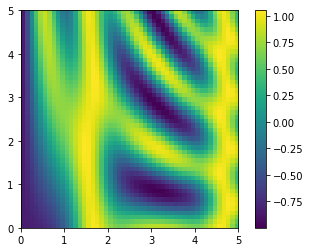

In [36]:
plt.imshow(z, origin='lower', extent=[0,5,0,5], cmap='viridis')
plt.colorbar();